# Image Classification using Neural Networks
In this lesson, we will learn more about unstructured inputs: images.

In this notebook, we will use a public dataset, the MNIST Digit data set. This dataset contains 60,000 images (28 x 28) of digits from 0-9.

In addition, the test set contains 10,000 similar images.

### Load and explore data
Using a python package by tensorflow (keras), we can directly import the data into our local environment.

We can use matplotlib to visualise some of the images.

In [1]:
%pip install -q tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2024-11-15 21:09:16.498102: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 21:09:16.502044: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 21:09:16.512865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731704956.531697    8061 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731704956.537303    8061 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 21:09:16.558608: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(train_images.shape)
print(type(train_images))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [5]:
print(test_images.shape)

(10000, 28, 28)


5


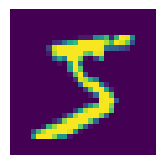

In [6]:
import matplotlib
import matplotlib.pyplot as plt

image = train_images[0]
image_pixels = image.reshape(28, 28)
plt.subplot(131)
plt.imshow(image_pixels)
plt.axis('off')

print(train_labels[0])
plt.show()

In [7]:
import numpy as np

(unique, counts) = np.unique(train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies


array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]])

All classes are pretty well-balanced

### Multi-class Classification

We will try using the architecture we learnt about last time - Artificial Neural Networks (ANNs)

We will also look at a much more efficient archiecture: Convolutional Neural Networks (CNNs)

In [8]:
train_images = train_images.reshape(60000, 28, 28, 1)
print(train_images.shape)

(60000, 28, 28, 1)


In [9]:
test_images = test_images.reshape(10000, 28, 28, 1)
print(test_images.shape)

(10000, 28, 28, 1)


### Fully Connected Neural Network (ANN)

This is the architecture we learnt about last lesson. 

In [10]:
ann = keras.models.Sequential()
#Input layer
ann.add(keras.layers.Flatten(input_shape=[28, 28, 1]))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#Hidden Layer 1
ann.add(keras.layers.Dense(50, activation='relu'))

#Hidden Layer 2
ann.add(keras.layers.Dense(25, activation='relu'))

2024-11-15 21:11:30.638427: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
#Output layer (with softmax)
ann.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,785 (159.32 KB)

 Trainable params: 40,785 (159.32 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
ann.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [16]:
ann.fit(train_images, train_labels, epochs=20, verbose=5)

Epoch 1/20


2024-11-15 21:14:00.579191: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


### Convolutional Neural Network (CNN)

This is the most commonly used architecture for image classification. 

Learn more about this architecture in this lesson's video: https://youtu.be/DbClQQZujxA

In [17]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(4, (4, 4), strides=2, activation='relu', input_shape=(28, 28, 1)))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.add(keras.layers.Flatten())
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 13, 4)      │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 6, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 144)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68 (272.00 B)

 Trainable params: 68 (272.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
cnn.add(keras.layers.Dense(50, activation='relu'))
cnn.add(keras.layers.Dense(25, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 13, 4)      │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 6, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         7,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,853 (34.58 KB)

 Trainable params: 8,853 (34.58 KB)

 Non-trainable params: 0 (0.00 B)

### Benefits of CNNs

Despite having a more complex architecture = more complex patterns, the number of parameters in a CNN are fewer (almost one-fourth).

|Architecture|HL 1|HL 2|Parameters|
|------------|----|----|----------|
|ANN|50|25|40785|
|CNN|50|25|8853|


In [20]:
cnn.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [21]:
cnn.fit(train_images, train_labels, epochs=20, verbose=5)

Epoch 1/20


2024-11-15 21:18:30.266000: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.
2024-11-15 21:18:30.850103: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24703744 exceeds 10% of free system memory.
2024-11-15 21:18:30.852669: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24703744 exceeds 10% of free system memory.
2024-11-15 21:18:30.854637: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 24703744 exceeds 10% of free system memory.


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


### Evaluating the Models

Since the problem is multi-class classification, we will only look at Accuracy

In [22]:
ann_score = ann.evaluate(test_images, test_labels)
print(f"ANN Accuracy: {ann_score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8515 - loss: 1.4192
ANN Accuracy: 0.859000027179718


In [23]:
cnn_score = cnn.evaluate(test_images, test_labels)
print(f"CNN Accuracy: {cnn_score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.9616 - loss: 0.1591
CNN Accuracy: 0.9661999940872192
